In [79]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scikit-learn as sklearn

SyntaxError: invalid syntax (<ipython-input-79-d46af0eb9c5e>, line 5)

### EDA exploratory section

In [ ]:
df = pd.read_csv("1.04. Real-life example.csv")

In [ ]:
df.describe(include = "all")

In [ ]:
sns.pairplot(df)

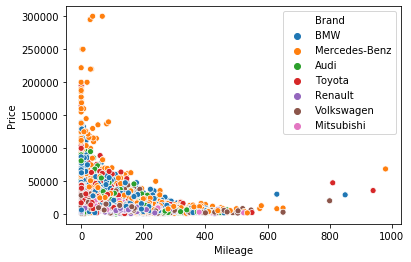

In [80]:
sns.scatterplot(df.Mileage, df.Price, hue = df.Brand)

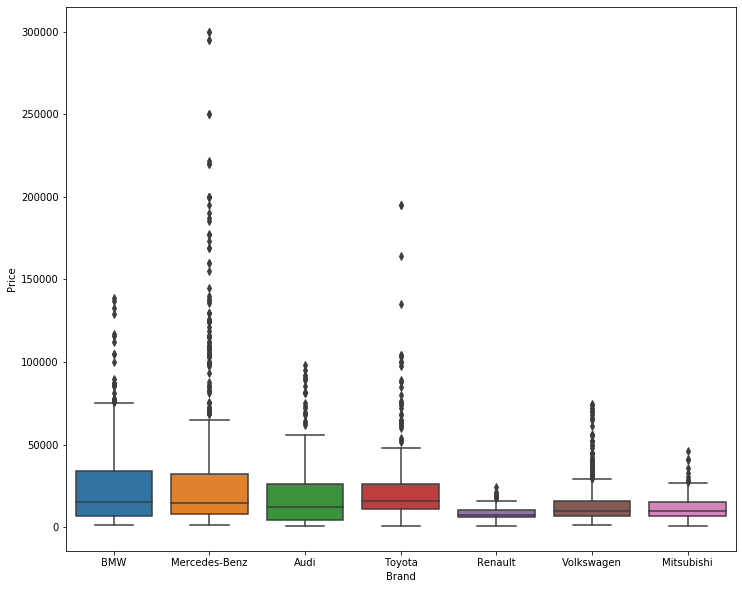

In [81]:
plt.figure(figsize = (12,10))
sns.boxplot(df.Brand, df.Price)

In [82]:
df.Body.value_counts()

sedan        1649
crossover     901
van           675
other         433
vagon         402
hatch         285
Name: Body, dtype: int64

In [83]:
df[df["Body"]=="other"]["EngineV"].nunique()

38

In [84]:
df.Brand.nunique()

7

In [85]:
df.corr()

,Price,Mileage,EngineV,Year
Price,1.000000,-0.464795,0.058664,0.487031
Mileage,-0.464795,1.000000,0.020959,-0.668635
EngineV,0.058664,0.020959,1.000000,-0.022866
Year,0.487031,-0.668635,-0.022866,1.000000


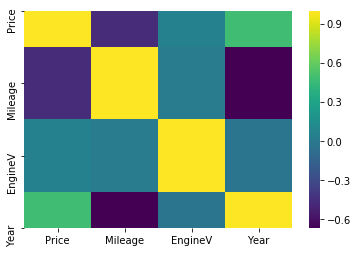

In [86]:
df.corr()
sns.heatmap(df.corr(), cmap= "viridis")

### Data Cleaning Section

In [87]:
df.describe()

,Price,Mileage,EngineV,Year
count,4173.000000,4345.000000,4195.000000,4345.000000
mean,19418.746935,161.237284,2.790734,2006.550058
std,25584.242620,105.705797,5.066437,6.719097
min,600.000000,0.000000,0.600000,1969.000000
25%,6999.000000,86.000000,1.800000,2003.000000
50%,11500.000000,155.000000,2.200000,2008.000000
75%,21700.000000,230.000000,3.000000,2012.000000
max,300000.000000,980.000000,99.990000,2016.000000


In [88]:
df.isnull().sum()

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
Model             0
dtype: int64

In [89]:
#since values of null are small, ie., less than 5% of dataset - we can drop them
df_dropnan = df.dropna(axis=0)

In [90]:
df_dropnan.describe()

,Price,Mileage,EngineV,Year
count,4025.000000,4025.000000,4025.000000,4025.000000
mean,19552.308065,163.572174,2.764586,2006.379627
std,25815.734988,103.394703,4.935941,6.695595
min,600.000000,0.000000,0.600000,1969.000000
25%,6999.000000,90.000000,1.800000,2003.000000
50%,11500.000000,158.000000,2.200000,2007.000000
75%,21900.000000,230.000000,3.000000,2012.000000
max,300000.000000,980.000000,99.990000,2016.000000


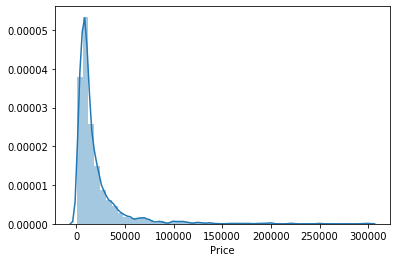

In [91]:
#we see that price has outliers sicne 75% of the data has car prices 22,000 or less
sns.distplot(df_dropnan["Price"])

In [92]:
#lets take only values in the top 99% quartile to drop outliers

q = df_dropnan["Price"].quantile(.99)
#q is the value where the price is equal to the 99% quantile
q

129812.51999999981

In [93]:
df_dropnan = df[df.Price < q]


In [94]:
df_dropnan.describe(include = "all")

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4132,4132.00000,4132,4132.000000,3984.000000,4132,4132,4132.000000,4132
unique,7,NaN,6,NaN,NaN,4,2,NaN,306
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,908,NaN,1598,NaN,NaN,1895,3738,NaN,193
mean,NaN,17763.66577,NaN,165.582527,2.743770,NaN,NaN,2006.283640,NaN
std,NaN,18939.71448,NaN,104.232463,4.956057,NaN,NaN,6.664444,NaN
min,NaN,600.00000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6900.00000,NaN,93.000000,1.800000,NaN,NaN,2002.000000,NaN
50%,NaN,11300.00000,NaN,160.000000,2.200000,NaN,NaN,2007.000000,NaN
75%,NaN,21000.00000,NaN,230.000000,3.000000,NaN,NaN,2011.000000,NaN


In [95]:
#since there are too many unique car models
df_dropnan.drop("Model", axis = 1, inplace = True)



/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [96]:
#since engine volumes have strange values, we will only keep rows wehre it is under 6.5 Liters

df_dropnan = df_dropnan[df.EngineV < 6.5]

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


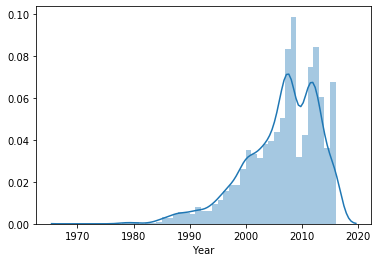

In [97]:
sns.distplot(df_dropnan.Year)

In [98]:
x = df_dropnan.Year.quantile(.01)
x

1987.0

In [99]:
#we also see that year data values have long tails in the 1% quartile, therefore, we will take all the values greater than the 1% quantile

df_dropnan = df_dropnan[df_dropnan.Year > df_dropnan.Year.quantile(.01)]

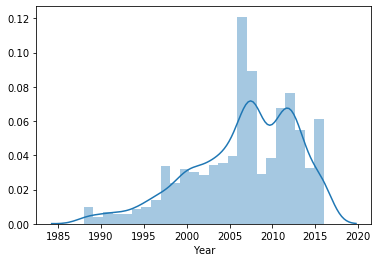

In [100]:
sns.distplot(df_dropnan.Year)

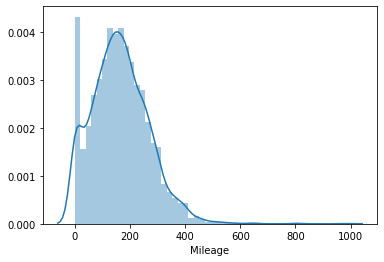

In [101]:
sns.distplot(df_dropnan.Mileage)

In [102]:
#we also see skewness in mileage, so we will take values less than 99% quantile
df_dropnan = df_dropnan[df_dropnan.Mileage < df_dropnan.Mileage.quantile(.99)]

In [103]:
df_cleaned = df_dropnan.reset_index(drop = True)

In [104]:
df_cleaned.describe(include = "all")

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3865,3865.000000,3865,3865.000000,3865.000000,3865,3865,3865.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,847,NaN,1466,NaN,NaN,1806,3504,NaN
mean,NaN,18201.438580,NaN,160.401035,2.450259,NaN,NaN,2006.716171
std,NaN,19088.279971,NaN,95.455403,0.949535,NaN,NaN,6.099113
min,NaN,800.000000,NaN,0.000000,0.600000,NaN,NaN,1988.000000
25%,NaN,7200.000000,NaN,91.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11700.000000,NaN,157.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,21700.000000,NaN,225.000000,3.000000,NaN,NaN,2012.000000


In [105]:
#kept values
df_cleaned["Price"].count()/df["Price"].count()

0.9261921878744309

### Checking assumptions for linear models

In [106]:
#since the scatter plots showed price looking like an exponential distribution - we will do a log transform
#this will allow us to assume linearity
df_cleaned["LogPrice"] = np.log(df_cleaned.Price)

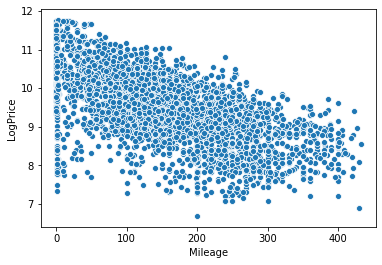

In [107]:
sns.scatterplot(df_cleaned.Mileage, df_cleaned.LogPrice)

In [108]:
df_cleaned.corr()

,Price,Mileage,EngineV,Year,LogPrice
Price,1.000000,-0.554301,0.393238,0.570721,0.856256
Mileage,-0.554301,1.000000,0.005174,-0.714654,-0.614612
EngineV,0.393238,0.005174,1.000000,-0.019775,0.412266
Year,0.570721,-0.714654,-0.019775,1.000000,0.746786
LogPrice,0.856256,-0.614612,0.412266,0.746786,1.000000


In [109]:
# sklearn does not have a built-in way to check for multicollinearity
# one of the main reasons is that this is an issue well covered in statistical frameworks and not in ML ones
# surely it is an issue nonetheless, thus we will try to deal with it

# Here's the relevant module
# full documentation: http://www.statsmodels.org/dev/_modules/statsmodels/stats/outliers_influence.html#variance_inflation_factor
from statsmodels.stats.outliers_influence import variance_inflation_factor

# To make this as easy as possible to use, we declare a variable where we put
# all features where we want to check for multicollinearity
# since our categorical data is not yet preprocessed, we will only take the numerical ones
variables = df_cleaned[['Mileage','Year','EngineV']]

# we create a new data frame which will include all the VIFs
# note that each variable has its own variance inflation factor as this measure is variable specific (not model specific)
vif = pd.DataFrame()

# here we make use of the variance_inflation_factor, which will basically output the respective VIFs 
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
# Finally, I like to include names so it is easier to explore the result
vif["Features"] = variables.columns

In [110]:
vif

,VIF,Features
0,3.797050,Mileage
1,10.361600,Year
2,7.658673,EngineV


In [111]:
#since we see colinearity between mileage and year, we will drop year
df_cleaned.drop("Year", axis = 1, inplace = True)

In [112]:
df_cleaned.drop("Price", axis = 1, inplace = True)


In [113]:
df_cleaned

,Brand,Body,Mileage,EngineV,Engine Type,Registration,LogPrice
0,BMW,sedan,277,2.00,Petrol,yes,8.342840
1,Mercedes-Benz,van,427,2.90,Diesel,yes,8.974618
2,Mercedes-Benz,sedan,358,5.00,Gas,yes,9.495519
3,Audi,crossover,240,4.20,Petrol,yes,10.043249
4,Toyota,crossover,120,2.00,Petrol,yes,9.814656
5,Audi,vagon,200,2.70,Diesel,yes,9.560997
6,Renault,vagon,193,1.50,Diesel,yes,9.287209
7,Volkswagen,other,212,1.80,Gas,no,7.244228
8,Renault,vagon,177,1.50,Diesel,yes,9.388487
9,Renault,sedan,260,1.79,Petrol,yes,7.824046


### Preprocessing Data and creating dummy vars for categorical features

In [114]:
#drop first makes sure we don't create multicolinearity with the dummy vars
data_wDummies = pd.get_dummies(df_cleaned, drop_first = True )

In [115]:
data_wDummies

,Mileage,EngineV,LogPrice,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,277,2.00,8.342840,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,427,2.90,8.974618,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,358,5.00,9.495519,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,240,4.20,10.043249,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,120,2.00,9.814656,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1
5,200,2.70,9.560997,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
6,193,1.50,9.287209,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1
7,212,1.80,7.244228,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0
8,177,1.50,9.388487,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1
9,260,1.79,7.824046,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1


### Running The Model

In [116]:
target = data_wDummies["LogPrice"]
features = data_wDummies.drop("LogPrice", axis = 1)

In [117]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()

scale.fit(features)
scaled_features = scale.transform(features)

In [118]:
from sklearn.model_selection import train_test_split

xTrain, xTest, yTrain, yTest = train_test_split(scaled_features, target, train_size = .8, random_state=42)

In [119]:
from sklearn.linear_model import LinearRegression

In [120]:
reg = LinearRegression()

In [121]:
reg.fit(xTrain, yTrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [122]:
reg.intercept_

9.415991303178279

In [123]:
reg.coef_

array([-0.46405496,  0.21475289,  0.01174527,  0.00874654, -0.13898131,
       -0.18673754, -0.0584273 , -0.09352494, -0.141793  , -0.09406918,
       -0.18592667, -0.1153181 , -0.15258227, -0.12488262, -0.03293518,
       -0.14956526,  0.31683932])

In [124]:
import statsmodels.api as sm

In [125]:
x = sm.add_constant(xTrain)

In [128]:
statsmod = sm.OLS(yTrain, x).fit()

In [129]:
statsmod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               LogPrice   R-squared:                       0.749
Model:                            OLS   Adj. R-squared:                  0.748
Method:                 Least Squares   F-statistic:                     540.3
Date:                Mon, 09 Mar 2020   Prob (F-statistic):               0.00
Time:                        21:59:34   Log-Likelihood:                -1853.7
No. Observations:                3092   AIC:                             3743.
Df Residuals:                    3074   BIC:                             3852.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.4160      0.008   1184.180      0.000       9.400       9.432
x1            -0.4641      0.009    -51.465      0.000      -0.482      -0.446
x2             0.2148      0.010     21.590      0.000       0.195       0.234
x3             0.0117      0.012      1.000      0.317      -0.011       0.035
x4             0.0087      0.012      0.700      0.484      -0.016       0.033
x5            -0.1390      0.011    -13.157      0.000      -0.160      -0.118
x6            -0.1867      0.012    -15.894      0.000      -0.210      -0.164
x7            -0.0584      0.012     -5.012      0.000      -0.081      -0.036
x8            -0.0935      0.013     -7.149      0.000      -0.119      -0.068
x9            -0.1418      0.010    -14.304      0.000      -0.161      -0.122
x10           -0.0941      0.010     -9.737      0.000      -0.113      -0.075
x11           -0.1859      0.012    -15.519      0.000      -0.209      -0.162
x12           -0.1153      0.011    -10.889      0.000      -0.136      -0.095
x13           -0.1526      0.012    -12.752      0.000      -0.176      -0.129
x14           -0.1249      0.010    -13.072      0.000      -0.144      -0.106
x15           -0.0329      0.008     -4.122      0.000      -0.049      -0.017
x16           -0.1496      0.010    -14.910      0.000      -0.169      -0.130
x17            0.3168      0.009     36.538      0.000       0.300       0.334
==============================================================================
Omnibus:                      676.334   Durbin-Watson:                   1.976
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2631.605
Skew:                          -1.032   Prob(JB):                         0.00
Kurtosis:                       7.020   Cond. No.                         4.32
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""